In [1]:
from ultralytics import YOLO,RTDETR

# model = YOLO("yolov8m.pt")                                                                                            
# model = YOLO("runs/detect/train3/weights/best.pt")
# model = YOLO("runs/detect/CNRPark3/weights/best.pt")
model = YOLO("runs/detect/Pklot2/weights/best.pt")
# model = YOLO("runs/detect/kitti/weights/best.pt")
# model = YOLO("runs/detect/exp_traditional/weights/best.pt")

In [ ]:
model.train(data="/media/nabil/Games/ml_project/yolo/datasets/CNRPark/data.yaml", name="CNRPark_Pklot", epochs=30, lr0=0.005, batch=8, seed=3000)
# model.train(resume=True)

In [5]:
# metrics = model.val(data="/media/nabil/Games/ml_project/yolo/datasets/kitti/data_test.yaml")
metrics = model.val(data="/media/nabil/Games/ml_project/yolo/datasets/exp/data_test.yaml")

Ultralytics YOLOv8.2.95 🚀 Python-3.12.5 torch-2.4.1 CUDA:0 (NVIDIA GeForce RTX 3070, 7871MiB)


Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients


val: Scanning /media/nabil/Games/ml_project/yolo/datasets/exp/valid/labels.cache... 154 images, 11 backgrounds, 0 corrupt: 100%|██████████| 154/154 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.98it/s]


                   all        154        539      0.888       0.77      0.862      0.677
Speed: 0.6ms preprocess, 4.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val6


In [6]:
metrics.results_dict

{'metrics/precision(B)': 0.8876535938101585,
 'metrics/recall(B)': 0.7699443413729128,
 'metrics/mAP50(B)': 0.8621120566450469,
 'metrics/mAP50-95(B)': 0.6766921711954155,
 'fitness': 0.6952341597403786}

In [22]:
def get_iou(pred_box, gt_box):
    import numpy as np
    
    """
    pred_box : the coordinate for predict bounding box
    gt_box :   the coordinate for ground truth bounding box
    return :   the iou score
    the  left-down coordinate of  pred_box:(pred_box[0], pred_box[1])
    the  right-up coordinate of  pred_box:(pred_box[2], pred_box[3])
    """
    # 1.get the coordinate of inters
    ixmin = max(pred_box[0], gt_box[0])
    ixmax = min(pred_box[2], gt_box[2])
    iymin = max(pred_box[1], gt_box[1])
    iymax = min(pred_box[3], gt_box[3])

    iw = np.maximum(ixmax-ixmin+1., 0.)
    ih = np.maximum(iymax-iymin+1., 0.)

    # 2. calculate the area of inters
    inters = iw*ih

    # 3. calculate the area of union
    uni = ((pred_box[2]-pred_box[0]+1.) * (pred_box[3]-pred_box[1]+1.) +
           (gt_box[2] - gt_box[0] + 1.) * (gt_box[3] - gt_box[1] + 1.) -
           inters)

    # 4. calculate the overlaps between pred_box and gt_box
    iou = inters / uni

    return iou

In [24]:
import os
import random
import cv2

base_path = "./datasets/parking_spot/bbox_c/test/images/"
label_base_path = "./datasets/parking_spot/bbox_c/test/labels/"
count = 6
files = []
labels = dict()

all_files = [f for f in os.listdir(base_path) if os.path.isfile(os.path.join(base_path, f))]
# Randomly pick the specified number of files
random.seed(0)
random_files = random.sample(all_files, count)

for filename in random_files:

    file_path = base_path+filename
    files.append(file_path)
    img = cv2.imread(file_path)
    h, w, channels = img.shape
    
    labels[file_path] = {
        "bbox": [],
        "class": []  # 0 is occupied 1 is not
    }
    
    with open(label_base_path+filename.replace(".jpg", ".txt"), "r") as f:
        for line in f:
            vals = line.strip().split(" ")
            vals = list(map(lambda x:float(x), vals))
            x1 = vals[1] - vals[3]/2
            y1 = vals[2] - vals[4]/2
            x2 = vals[1] + vals[3]/2
            y2 = vals[2] + vals[4]/2
            labels[file_path]["class"].append(vals[0])
            labels[file_path]["bbox"].append( [x1 * w, y1 * h, x2 * w, y2 * h] )     

    count -= 1


print(files)


['./datasets/parking_spot/bbox_c/test/images/frame_18_126_jpg.rf.3eeddf92b1a7963bff2e5b4853ef8eb3.jpg', './datasets/parking_spot/bbox_c/test/images/frame_1_11_jpg.rf.3d66dd68a728cb39825e55950375b857.jpg', './datasets/parking_spot/bbox_c/test/images/frame_0_103_jpg.rf.70bb1af26775b4fe0498c6b3ecbe8391.jpg', './datasets/parking_spot/bbox_c/test/images/frame_12_5_jpg.rf.944fbf8dad3ee3383289fab15da2fcd8.jpg', './datasets/parking_spot/bbox_c/test/images/frame_14_59_jpg.rf.29a3d655d18b0122552c32f255fa517c.jpg', './datasets/parking_spot/bbox_c/test/images/frame_18_71_jpg.rf.3d055ad77f282003ed07b1a3c9c8ec4d.jpg']


In [29]:
print(labels)

{'./datasets/parking_spot/bbox_c/test/images/frame_18_126_jpg.rf.3eeddf92b1a7963bff2e5b4853ef8eb3.jpg': {'bbox': [[589.9999999999999, 250.0, 741.9999999999999, 362.0], [746.25, 236.24999999999997, 883.75, 351.74999999999994], [428.25, 245.24999999999997, 581.75, 372.75], [237.5, 259.75, 407.5, 396.25], [91.75, 85.25, 216.25, 141.75]], 'class': [0.0, 1.0, 1.0, 1.0, 0.0]}, './datasets/parking_spot/bbox_c/test/images/frame_1_11_jpg.rf.3d66dd68a728cb39825e55950375b857.jpg': {'bbox': [[793.75, 83.00000000000001, 941.25, 162.0], [994.5, 111.0, 1126.5, 200.99999999999997], [636.4999999999999, 70.25, 765.5, 134.75], [501.75, 50.00000000000001, 628.25, 111.0], [340.75, 59.75000000000001, 424.25, 85.25], [397.24999999999994, 66.25, 493.75, 99.75], [1211.0, 135.5, 1280.0, 234.50000000000003], [1093.75, 91.0, 1159.25, 133.0], [958.25, 75.24999999999999, 1025.75, 111.74999999999999], [843.5, 53.49999999999999, 923.5, 93.49999999999999], [731.0000000000001, 48.99999999999999, 803.0, 89.0], [212.5, 6

In [25]:
# Run batched inference on a list of images
results = model.predict(files, conf=0)  # return a list of Results objects

    # print("boxes  ", boxes.xyxy)
    # result.show()  # display to screen
    # result.save(filename="result.jpg")  # save to disk


0: 288x640 175 parking-spot-occupieds, 125 parking-spot-not-occupieds, 5.8ms
1: 288x640 179 parking-spot-occupieds, 121 parking-spot-not-occupieds, 5.8ms
2: 288x640 114 parking-spot-occupieds, 186 parking-spot-not-occupieds, 5.8ms
3: 288x640 209 parking-spot-occupieds, 91 parking-spot-not-occupieds, 5.8ms
4: 288x640 117 parking-spot-occupieds, 183 parking-spot-not-occupieds, 5.8ms
5: 288x640 129 parking-spot-occupieds, 171 parking-spot-not-occupieds, 5.8ms
Speed: 3.4ms preprocess, 5.8ms inference, 2.1ms postprocess per image at shape (1, 3, 288, 640)


In [26]:
for r in results:
    for b in r.boxes:
        print(b)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([8.1612e-05], device='cuda:0')
data: tensor([[1.1713e+02, 2.0165e+02, 1.8745e+02, 2.5745e+02, 8.1612e-05, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (540, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[152.2898, 229.5519,  70.3177,  55.7970]], device='cuda:0')
xywhn: tensor([[0.1190, 0.4251, 0.0549, 0.1033]], device='cuda:0')
xyxy: tensor([[117.1310, 201.6534, 187.4487, 257.4504]], device='cuda:0')
xyxyn: tensor([[0.0915, 0.3734, 0.1464, 0.4768]], device='cuda:0')
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([3.4435e-05], device='cuda:0')
data: tensor([[1.1631e+02, 2.3591e+02, 1.8058e+02, 2.8871e+02, 3.4435e-05, 0.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: (540, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[148.4456, 262.3093,  64.2634,  52.8012]], device='cuda:0')
xywhn: t

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


{3: [51, 0.3964385335155783], 4: [60, 0.21742820571695812], 1: [85, 0.4316311809667198], 2: [96, 0.1125755597867682], 0: [113, 0.2474229513560552]}
Confusion Matrix : 
[2] [3]
[0] [0]
0.4
{8: [1, 0.2377980914882728], 7: [13, 0.345230698929914], 6: [18, 0.23822511313527897], 9: [44, 0.11707358971007023], 1: [45, 0.1250790262075818], 0: [57, 0.28217994766386056], 12: [152, 0.19977043271776035], 4: [161, 0.2793103204682005], 5: [177, 0.16641763225200223], 11: [228, 0.10340979532668755], 3: [233, 0.27828573739951856], 10: [250, 0.25046597853207625], 2: [283, 0.11277333925005958]}
Confusion Matrix : 
[11] [2]
[0] [1]
0.8571428571428571


SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


{4: [3, 0.4252714134165003], 43: [16, 0.10959844357440959], 26: [18, 0.338872773349836], 25: [23, 0.39972685768941046], 45: [34, 0.28764360237835146], 9: [35, 0.41256746862638255], 41: [41, 0.6579628278469217], 2: [49, 0.4513987394749824], 47: [54, 0.26798247763896693], 10: [55, 0.2153649201718886], 24: [57, 0.33823317003856856], 15: [65, 0.28040422750008914], 40: [74, 0.32445772962365843], 18: [80, 0.11245257321915546], 28: [82, 0.10046175265679931], 14: [87, 0.34446216933628915], 57: [89, 0.11235802377767079], 16: [99, 0.2042752614080094], 3: [104, 0.23048824087091987], 37: [110, 0.11033964628655539], 39: [111, 0.132283161154092], 50: [121, 0.16212052418897382], 23: [136, 0.2207806238311463], 38: [140, 0.279612071890018], 34: [148, 0.3220694487492204], 21: [153, 0.15986274837303466], 51: [159, 0.11871664963392344], 49: [165, 0.3157945657139659], 27: [168, 0.16669355340366654], 46: [174, 0.16557255078257832], 6: [176, 0.35305283051452924], 8: [181, 0.38264478093958315], 42: [189, 0.16

SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.
SupervisionWarnings: BoundingBoxAnnotator is deprecated: `BoundingBoxAnnotator` is deprecated and has been renamed to `BoxAnnotator`. `BoundingBoxAnnotator` will be removed in supervision-0.26.0.


{0: [0, 0.2536274321803918], 1: [9, 0.21371004361169618], 3: [34, 0.19988177424988274], 2: [84, 0.22801650579736962], 13: [150, 0.14341920414041137], 4: [156, 0.10700414710331917], 12: [157, 0.1284246617296111], 11: [160, 0.12625010976823636], 5: [164, 0.12768742520127183], 6: [175, 0.1125197912351278], 8: [247, 0.16138542734006436], 7: [298, 0.10043471480949952]}
Confusion Matrix : 
[8] [4]
[4] [6]
0.6363636363636364
{0: [5, 0.13073376059957492], 4: [25, 0.11007922137089723], 3: [27, 0.48079773266148684], 1: [80, 0.2228568429560272], 2: [168, 0.11259033597908284]}
Confusion Matrix : 
[3] [2]
[0] [0]
0.6
Accuracy:  0.6198854908532327


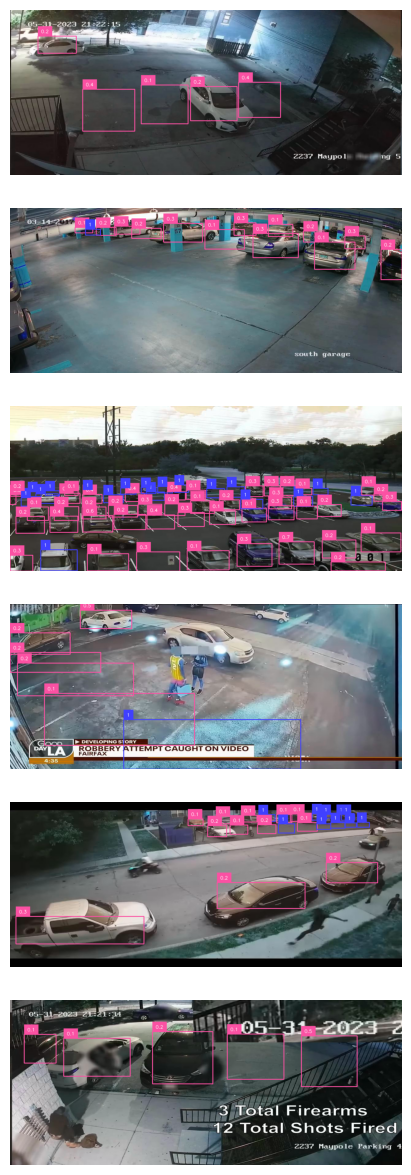

In [30]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import cv2
import supervision as sv
import numpy as np
import time

%matplotlib inline
fig, axes = plt.subplots(len(results), 1, figsize=(20, 15))
cum_accuracy = 0

total = {
    "tp":0,
    "tn":0,
    "fn":0,
    "fp":0
}


for r_i, result in enumerate(results):

    # if r_i != 4:
    #     continue

    result = result.to('cpu')
    boxes = result.boxes
    file_path = files[r_i]
    img = cv2.imread(file_path)
    height, width, channels = img.shape
    
    detection_data = {
        "xyxy": [],
        "class_id": [],
        "confidence": []
    }

    assignments = {}  # label_box_i: [car_box_i, iou]
    for rb_i, car_box in enumerate(result.boxes):
        max_iou = 0
        best_match_park_i = None
        car_box = car_box.xyxy.numpy()[0]
    
        for lb_i, label_box in enumerate(labels[file_path]["bbox"]):
            label_class = labels[file_path]["class"][lb_i] 

            # skip parking spot that has already been assigned to another car
            if lb_i in assignments:
                continue

            iou = get_iou(car_box, label_box)
            if iou > .1:
                if iou > max_iou:
                    best_match_park_i = lb_i
                    max_iou = iou
        
        if best_match_park_i is not None:
            assignments[best_match_park_i] = [rb_i, max_iou]


    for label_box_i, _ in enumerate(labels[file_path]["bbox"]):
        label_class = labels[file_path]["class"][label_box_i]
        detection_data["xyxy"].append(np.array(labels[file_path]["bbox"][label_box_i]))
        detection_data["class_id"].append( 0 if label_box_i in assignments else 1 )
        detection_data["confidence"].append(round( assignments[label_box_i][1] if label_box_i in assignments else 1, 1))

    tp, tn, fp, fn = 0,0,0,0
    for l_i, cls in enumerate(labels[file_path]["class"]):
        if cls == 0:
            if l_i in assignments:
                tp += 1
            else:
                fn += 1
        else:
            if l_i in assignments:
                fp += 1
            else:
                tn += 1
    
    accuracy = (tp+tn)/(tp+tn+fp+fn)   
    cum_accuracy += accuracy     
    
    if detection_data["xyxy"] == []:
        continue

    detection_data["xyxy"] = np.array(detection_data["xyxy"])

    detections = sv.Detections(
        xyxy= np.array(detection_data["xyxy"]),
        class_id= np.array(detection_data["class_id"]),
        confidence= np.array(detection_data["confidence"])
    )

    bounding_box_annotator = sv.BoundingBoxAnnotator()
    annotated_frame = bounding_box_annotator.annotate(
        scene=img.copy(),
        detections=detections,
    )

    label_annotator = sv.LabelAnnotator()
    annotated_image = label_annotator.annotate(
        scene=annotated_frame, 
        detections=detections, 
        labels=list(map( lambda x:str(x), detection_data["confidence"]))
    )

    axes[r_i].imshow(annotated_frame)
    axes[r_i].axis('off')

    print(assignments)
    total["tp"] += tp
    total["fp"] += fp
    total["tn"] += tn
    total["fn"] += fn
    # plt.imshow(annotated_frame)
    # plt.axis('off')
    print(accuracy)
    time.sleep(0.1)

print("Accuracy: ", cum_accuracy / len(results))
print("Confusion Matrix : ")
print(f"[{total["tp"]}] [{total["fp"]}]")
print(f"[{total["fn"]}] [{total["tn"]}]")

# plt.show()

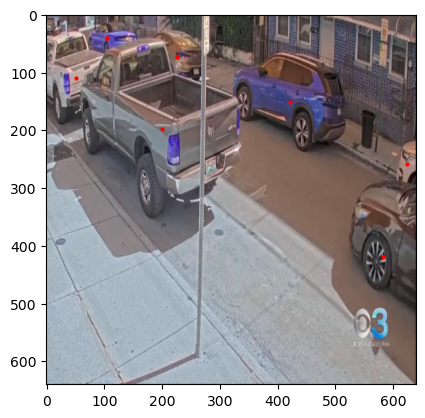

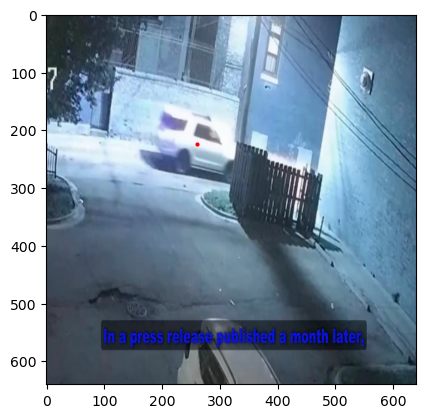

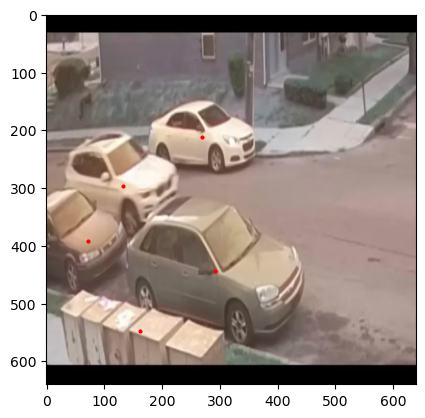

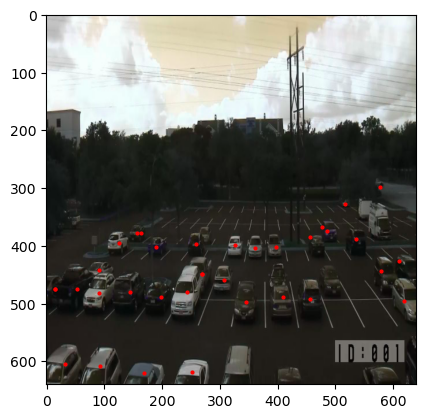

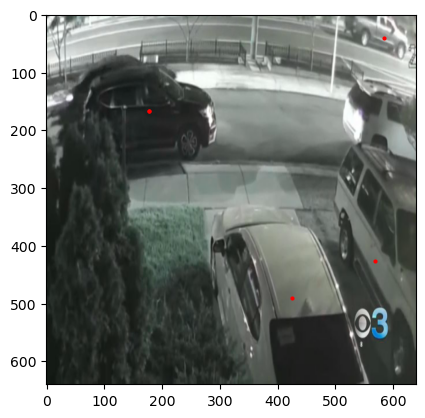

Accuracy:  0.9580200501253133


In [28]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import cv2

%matplotlib inline

accuracy = 0

# Process results list
for r_i, result in enumerate(results):
    
    # print(result.boxes)

    file_path = files[r_i]
    img = cv2.imread(file_path)
    new_dimensions = (640, 640)
    img = cv2.resize(img, new_dimensions)
    plt.imshow(img)

    result = result.to("cpu")
    boxes = result.boxes  
    found_count = 0
    for label_box in labels[file_path]["bbox"]:
        for b_i, box in enumerate(boxes.xywhn):
            # print( result.boxes )
            box = box.tolist()
            bx = box[0]
            by = box[1]
            lx1, ly1, lx2, ly2 = label_box
            if bx > lx1 and bx < lx2 and by > ly1 and by < ly2:
                found_count += 1
                #TODO: need to check if parking spot occupied/not occupied label 
                plt.plot(bx*img.shape[0], by*img.shape[1], 'ro', markersize=2)
                # break

    accuracy += found_count / len(labels[file_path]["bbox"])
    # print(found_count / len(labels[file_path]["bbox"]))
    plt.show()


accuracy = accuracy / len(labels.keys())
print("Accuracy: ", accuracy)